In [54]:
import numpy as np
import matplotlib.pyplot as plt



def LF(phi, u0, ua, ub, Intx, tN, Deltax, Deltat):
    # Solves the PDE in a < x < b, t > 0
    #
    # u_t + ( phi(u) )_x = 0
    #
    # u(x,0) = u0(x)
    #
    # with boundary conditions
    # u(a,t) = ua
    # u(b,t) = ub

    (a,b) = Intx

    Nx = int((b-a)/Deltax);
    Nt = int((tN-0)/Deltat);


    sol = np.zeros([Nt,Nx]);
    for ix in range(Nx):
        sol[0,ix] = u0(a+Deltax*ix);

    for it in range(1,Nt):
        sol[it,0] = ua;
        sol[it,Nx-1]=ub;
        for ix in range(1,Nx-1):
            sol[it,ix] = (sol[it-1,ix+1]+sol[it-1,ix-1])/2 -(Deltat/Deltax)*(phi(sol[it-1,ix+1])-phi(sol[it-1,ix-1]))/2

    return sol





Define the initial function $\rho_0$

In [55]:
def rho0(x):
    if x<0: return rho_min
    else: return rho_max
    # else: return rho_max + (rho_max-rho_min)*x;

vrho = np.vectorize(rho0)

Define the function $\phi(u)$

In [98]:
v_max = 120
rho_min = 20
rho_max = 120

phi = lambda u: v_max*u*( 1 - u/rho_max);

Set up the initial configuration.

Also set up the **first** approximation: $\Delta_x$ and $\Delta_t$

In [99]:
Nx = 110
a = -10
b = 1
intervalx = (a,b)
Deltax = (b-a)/Nx

tN = 0.5
Nt = 100
Deltat = tN/Nt

X = np.linspace(a,b,Nx);


Run the **first** approximation and plot it for each 0.1 seconds

In [100]:
rhoa = rho_min
rhob = rho_max

rho = LF(phi, vrho, rhoa, rhob, intervalx, tN, Deltax, Deltat)

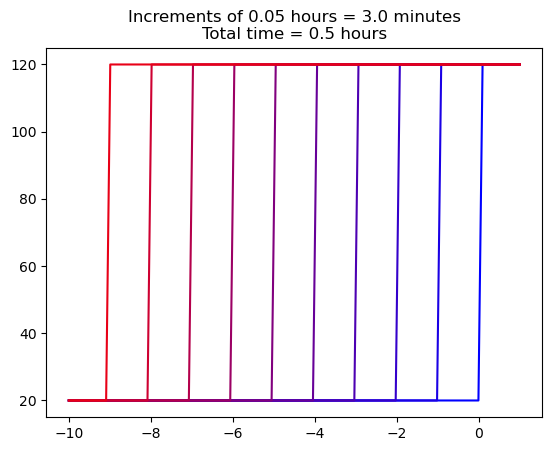

In [101]:
b_range=np.linspace(0, 1, Nt)

time_step = 10

i=0
while (i < Nt):
    plt.plot(X,rho[i,:],color=(b_range[i], 0, 1-b_range[i]))
    i += time_step
    
plt.title(f"Increments of {time_step*Deltat:.2f} hours = {time_step*Deltat*60:.1f} minutes\nTotal time = {tN:.1f} hours");
# plt.savefig("traffic_flow-120.png")

The colors above change with $t$: from blue for $t=0$ to red for $t=t_N$

--

Save the plots as a video as $t$ goes from $0$ to $t_N$.

In [91]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_title(f'Time t={i*Deltat:.2f} hours = {i*Deltat*60:.0f} minutes')
    ax.plot(X, rho[i, :], color=(b_range[i], 0, 1 - b_range[i]))
    ax.set_ylim([10,130])
    return ax

ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=50)

ani.save('traffic_flow-120.mp4')
plt.close(fig) #added to prevent showing the last frame as static image

---
Now we will use the values from Exercise 32.

Define the function $\phi(u)$

In [102]:
v_max = 60
rho_min = 20
rho_max = 120

phi = lambda u: v_max*u*( 1 - u/rho_max);
# def phi(u):
    # return (1 - u/rho_max)*v_max*u

# phi = lambda u: -1.2*u

Set up the initial configuration.

Also set up the **first** approximation: $\Delta_x$ and $\Delta_t$

In [113]:
Nx = 550
a = -10
b = 1
intervalx = (a,b)
Deltax = (b-a)/Nx

tN = 1
Nt = 500
Deltat = tN/Nt

X = np.linspace(a,b,Nx);


Run the **first** approximation and plot it for each 0.1 seconds

In [114]:
rhoa = rho_min
rhob = rho_max

rho = LF(phi, vrho, rhoa, rhob, intervalx, tN, Deltax, Deltat)

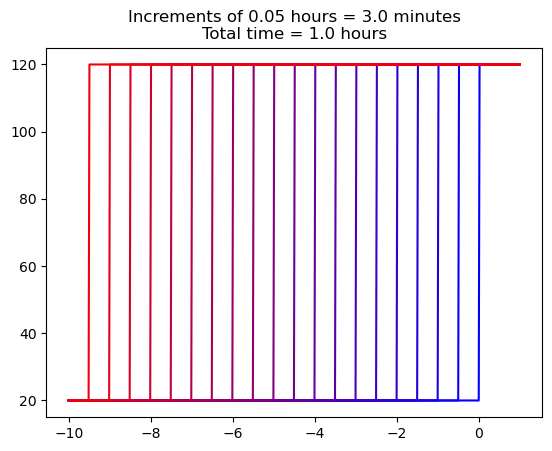

In [118]:
b_range=np.linspace(0, 1, Nt)

time_step = 25

i=0
while (i < Nt):
    # plt.title(f'Time t={i*Deltat:.2f} hours = {i*Deltat*60:.0f} minutes')
    plt.plot(X,rho[i,:],color=(b_range[i], 0, 1-b_range[i]))
    i += time_step

plt.title(f"Increments of {time_step*Deltat:.2f} hours = {time_step*Deltat*60:.1f} minutes\nTotal time = {tN:.1f} hours");
# print("Graphs plotted in increments of ",10*Deltat," hours = ", 10*Deltat*60," minutes")

# plt.savefig("traffic_flow-60.png")

The colors above change with $t$: from blue for $t=0$ to red for $t=t_N$

--

Save the plots as a video as $t$ gors from $0$ to $t_N$.

In [119]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    ax.set_title(f'Time t={i*Deltat:.2f} hours = {i*Deltat*60:.0f} minutes')
    ax.plot(X, rho[i, :], color=(b_range[i], 0, 1 - b_range[i]))
    ax.set_ylim([10,130])
    return ax

ani = animation.FuncAnimation(fig, animate, frames=Nt, interval=50)

ani.save('traffic_flow-60.mp4')
plt.close(fig) #added to prevent showing the last frame as static image